### Vaibhav Kumar
### Roll No : 19

### Multivarient Regression - mpg dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [46]:
data=pd.read_fwf("D:\\vk\\TRIM 3\\ML\\DATASET\\auto-mpg.data")
data

,18.0,8,307.0,130.0,3504.,12.0,70,1,"""chevrolet chevelle malibu"""
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [47]:
col_names=['mpg','cylinder','displacement','horsepower','weight','acceleration','modelyear','origin','carname']


In [48]:
data.columns=col_names

In [49]:
data

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [50]:
data.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""


In [51]:

data.describe()

,mpg,cylinder,displacement,weight,acceleration,modelyear,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinder      397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   modelyear     397 non-null    int64  
 7   origin        397 non-null    int64  
 8   carname       397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [53]:
data.shape

(397, 9)

In [54]:
data.isnull()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
392,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False


In [55]:
data['carname'].value_counts()

"ford pinto"             6
"amc matador"            5
"toyota corolla"         5
"ford maverick"          5
"amc hornet"             4
                        ..
"chevrolet monza 2+2"    1
"ford mustang ii"        1
"pontiac astro"          1
"amc pacer"              1
"chevy s-10"             1
Name: carname, Length: 305, dtype: int64

In [56]:
type(data)

pandas.core.frame.DataFrame

<AxesSubplot:>

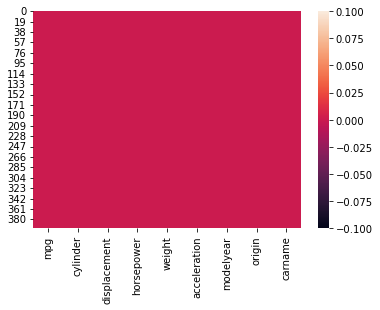

In [57]:
sns.heatmap(data.isnull())

**no null value is there**

<AxesSubplot:xlabel='origin', ylabel='count'>

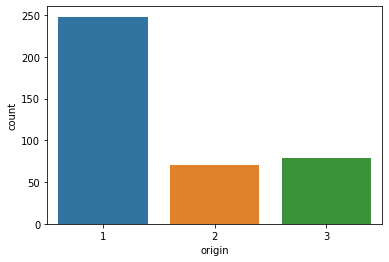

In [58]:
sns.countplot(x='origin',data=data)

In [59]:
data['carname'].unique()

array(['"buick skylark 320"', '"plymouth satellite"', '"amc rebel sst"',
       '"ford torino"', '"ford galaxie 500"', '"chevrolet impala"',
       '"plymouth fury iii"', '"pontiac catalina"',
       '"amc ambassador dpl"', '"dodge challenger se"',
       '"plymouth \'cuda 340"', '"chevrolet monte carlo"',
       '"buick estate wagon (sw)"', '"toyota corona mark ii"',
       '"plymouth duster"', '"amc hornet"', '"ford maverick"',
       '"datsun pl510"', '"volkswagen 1131 deluxe sedan"',
       '"peugeot 504"', '"audi 100 ls"', '"saab 99e"', '"bmw 2002"',
       '"amc gremlin"', '"ford f250"', '"chevy c20"', '"dodge d200"',
       '"hi 1200d"', '"chevrolet vega 2300"', '"toyota corona"',
       '"ford pinto"', '"plymouth satellite custom"',
       '"chevrolet chevelle malibu"', '"ford torino 500"',
       '"amc matador"', '"pontiac catalina brougham"',
       '"dodge monaco (sw)"', '"ford country squire (sw)"',
       '"pontiac safari (sw)"', '"amc hornet sportabout (sw)"',
       '"ch

In [60]:
data['carname']=[i[0]for i in data['carname'].str.split(' ')]

In [61]:
data['carname'].unique()

array(['"buick', '"plymouth', '"amc', '"ford', '"chevrolet', '"pontiac',
       '"dodge', '"toyota', '"datsun', '"volkswagen', '"peugeot', '"audi',
       '"saab', '"bmw', '"chevy', '"hi', '"mercury', '"opel', '"fiat',
       '"oldsmobile', '"chrysler', '"mazda', '"volvo', '"renault',
       '"toyouta', '"maxda', '"honda', '"subaru"', '"chevroelt', '"capri',
       '"vw', '"mercedes-benz', '"cadillac', '"subaru', '"mercedes',
       '"vokswagen', '"triumph', '"nissan'], dtype=object)

In [62]:
data['carname']=data['carname'].replace(['"chevrolet','"chevy','"chevroelt'],'chevrolet')
data['carname']=data['carname'].replace(['"volkswagen','"vokswagen','"vw'],'volkswagen')
data['carname']=data['carname'].replace('"maxda','mazda')
data['carname']=data['carname'].replace('"toyouta','toyota')
data['carname']=data['carname'].replace('"mercedes','mercedes-benz')
data['carname']=data['carname'].replace('"nissan','datsun')
data['carname']=data['carname'].replace('"capri','ford')
                
                                                 

In [64]:
data['carname'].unique()

array(['"buick', '"plymouth', '"amc', '"ford', 'chevrolet', '"pontiac',
       '"dodge', '"toyota', '"datsun', 'volkswagen', '"peugeot', '"audi',
       '"saab', '"bmw', '"hi', '"mercury', '"opel', '"fiat',
       '"oldsmobile', '"chrysler', '"mazda', '"volvo', '"renault',
       'toyota', 'mazda', '"honda', '"subaru"', 'ford', '"mercedes-benz',
       '"cadillac', '"subaru', 'mercedes-benz', '"triumph', 'datsun'],
      dtype=object)

In [65]:
org=pd.get_dummies(data.origin,prefix='org')
org

,org_1,org_2,org_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
392,1,0,0
393,0,1,0
394,1,0,0
395,1,0,0


<AxesSubplot:xlabel='cylinder', ylabel='count'>

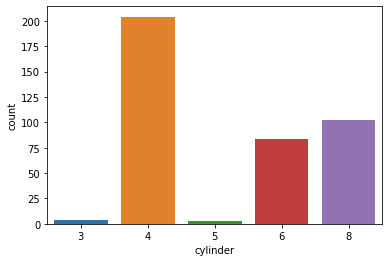

In [66]:
sns.countplot(x='cylinder',data=data)

In [67]:
cyl=pd.get_dummies(data.cylinder,prefix='cyl')
cyl

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
392,0,1,0,0,0
393,0,1,0,0,0
394,0,1,0,0,0
395,0,1,0,0,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinder      397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   modelyear     397 non-null    int64  
 7   origin        397 non-null    int64  
 8   carname       397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


<AxesSubplot:xlabel='modelyear', ylabel='count'>

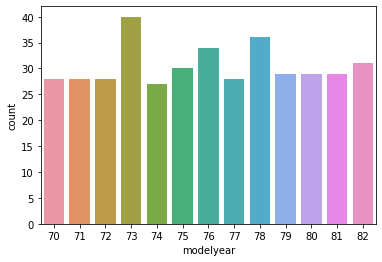

In [69]:
sns.countplot(x='modelyear',data=data)

In [70]:
year=pd.get_dummies(data.modelyear,prefix='year')
year

,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,0,0,0,0,0,0,0,0,1
393,0,0,0,0,0,0,0,0,0,0,0,0,1
394,0,0,0,0,0,0,0,0,0,0,0,0,1
395,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
cn=pd.get_dummies(data['carname'],prefix='cn')
cn

,"cn_""amc","cn_""audi","cn_""bmw","cn_""buick","cn_""cadillac","cn_""chrysler","cn_""datsun","cn_""dodge","cn_""fiat","cn_""ford",...,"cn_""toyota","cn_""triumph","cn_""volvo",cn_chevrolet,cn_datsun,cn_ford,cn_mazda,cn_mercedes-benz,cn_toyota,cn_volkswagen
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
394,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick"
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth"
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc"
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford"
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford"
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford"
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,volkswagen
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge"
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford"


In [77]:
data.drop(['origin','cylinder','modelyear','carname'],axis=1,inplace=True)

KeyError: "['origin', 'cylinder', 'modelyear', 'carname'] not found in axis"

In [78]:
data

,mpg,displacement,horsepower,weight,acceleration,"cn_""amc","cn_""audi","cn_""bmw","cn_""buick","cn_""cadillac",...,year_81,year_82,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,org_1,org_2,org_3
0,15.0,350.0,165.0,3693.0,11.5,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,18.0,318.0,150.0,3436.0,11.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,17.0,302.0,140.0,3449.0,10.5,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,15.0,429.0,198.0,4341.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,140.0,86.00,2790.0,15.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
393,44.0,97.0,52.00,2130.0,24.6,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
394,32.0,135.0,84.00,2295.0,11.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
395,28.0,120.0,79.00,2625.0,18.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [74]:
data=pd.concat([data,cn,year,cyl,org],axis=1)
data




,mpg,displacement,horsepower,weight,acceleration,"cn_""amc","cn_""audi","cn_""bmw","cn_""buick","cn_""cadillac",...,year_81,year_82,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,org_1,org_2,org_3
0,15.0,350.0,165.0,3693.0,11.5,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,18.0,318.0,150.0,3436.0,11.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,17.0,302.0,140.0,3449.0,10.5,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,15.0,429.0,198.0,4341.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,140.0,86.00,2790.0,15.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
393,44.0,97.0,52.00,2130.0,24.6,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
394,32.0,135.0,84.00,2295.0,11.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
395,28.0,120.0,79.00,2625.0,18.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [79]:
data.shape

(397, 60)

In [84]:
data[['displacement','horsepower','weight','acceleration']]=StandardScaler().fit_transform(data[['displacement','horsepower','weight','acceleration']])

C:\Users\studentadmin\AppData\Local\Temp\ipykernel_6952\2376225795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['displacement','horsepower','weight','acceleration']]=StandardScaler().fit_transform(data[['displacement','horsepower','weight','acceleration']])


In [81]:
sum(data.horsepower=='?')

6

In [82]:
data=data[data.horsepower!='?']

In [83]:
data

,mpg,displacement,horsepower,weight,acceleration,"cn_""amc","cn_""audi","cn_""bmw","cn_""buick","cn_""cadillac",...,year_81,year_82,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,org_1,org_2,org_3
0,15.0,350.0,165.0,3693.0,11.5,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,18.0,318.0,150.0,3436.0,11.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,17.0,302.0,140.0,3449.0,10.5,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,15.0,429.0,198.0,4341.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,140.0,86.00,2790.0,15.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
393,44.0,97.0,52.00,2130.0,24.6,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
394,32.0,135.0,84.00,2295.0,11.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
395,28.0,120.0,79.00,2625.0,18.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [85]:
y=data.pop('mpg')

In [86]:
y


0      15.0
1      18.0
2      16.0
3      17.0
4      15.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 391, dtype: float64

In [87]:
x=data


In [88]:
x.head(269)

,displacement,horsepower,weight,acceleration,"cn_""amc","cn_""audi","cn_""bmw","cn_""buick","cn_""cadillac","cn_""chrysler",...,year_81,year_82,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,org_1,org_2,org_3
0,1.491799,1.575170,0.844259,-1.471246,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.185545,1.185250,0.541544,-1.652864,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1.051559,1.185250,0.538010,-1.289628,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.032419,0.925303,0.556856,-1.834482,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,2.247862,2.432994,1.607524,-2.016100,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,-0.575413,-0.244456,-0.490278,-0.490508,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
267,-0.718969,-0.192467,-0.796526,-0.308890,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
268,-0.852955,-0.764349,-0.878977,-0.381537,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
269,-0.575413,-0.244456,-0.543282,-0.272566,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


**dividing** 
**80:20**



In [89]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=69)

In [90]:
LR=LinearRegression()
LR.fit(trainx,trainy)

LinearRegression()

In [91]:
pred=LR.predict(testx)
mean_squared_error(pred,testy)

6.538767175795156

In [93]:
df=pd.DataFrame({'Actual':testy,'Predicted':pred})

In [94]:
df

,Actual,Predicted
206,20.0,22.947266
174,29.0,29.570312
88,15.0,15.038086
18,26.0,32.182617
87,14.0,13.333008
...,...,...
105,12.0,12.300781
211,16.5,14.423828
61,13.0,12.058594
199,18.0,17.632812


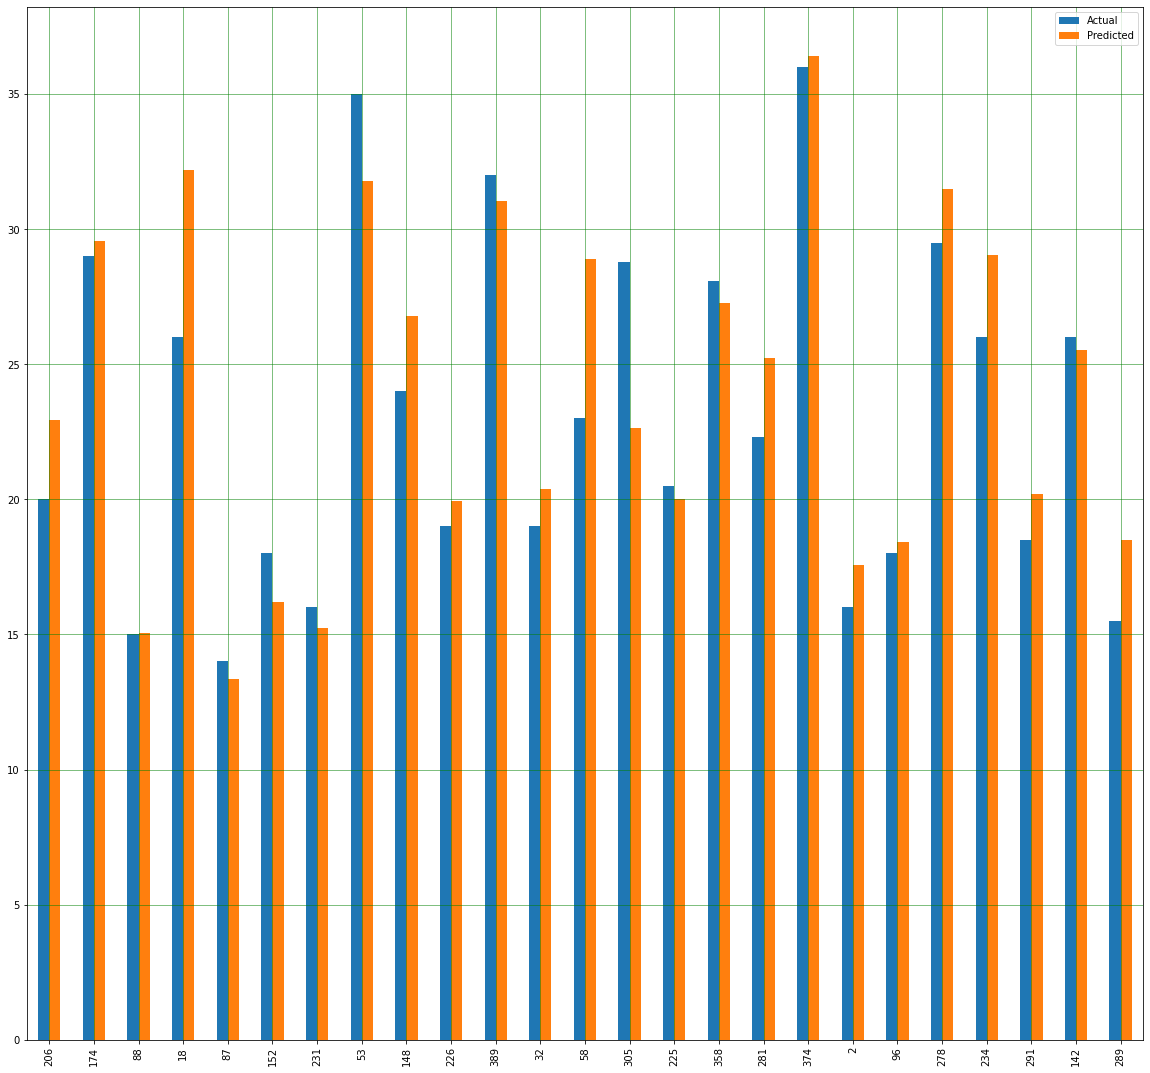

In [95]:
df1=df.head(25)
df1.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,19));
plt.grid(which='major',ls='-',linewidth=0.5,color='g')
plt.grid(which='minor',ls=':',linewidth=0.5,color='b')
plt.show()

In [96]:
print('Mean Absolute Error',mean_absolute_error(testy,pred))
print('Mean Squared Error',mean_squared_error(testy,pred))
print('Root Mean Sqaured Error',np.sqrt(mean_squared_error(testy,pred)))

Mean Absolute Error 2.012801621835443
Mean Squared Error 6.538767175795156
Root Mean Sqaured Error 2.5571013229426707


**divding 70:30**

In [98]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.3,random_state=69)

In [99]:
LR=LinearRegression()
LR.fit(trainx,trainy)

LinearRegression()

In [100]:
pred=LR.predict(testx)
mean_squared_error(pred,testy)

3.0270984824050786e+25

In [101]:
df=pd.DataFrame({'Actual':testy,'Predicted':pred})
df

,Actual,Predicted
206,20.0,23.314453
174,29.0,29.451172
88,15.0,15.099609
18,26.0,31.904297
87,14.0,13.521484
...,...,...
136,13.0,13.380859
380,36.0,35.531250
240,22.0,25.265625
64,14.0,13.130859


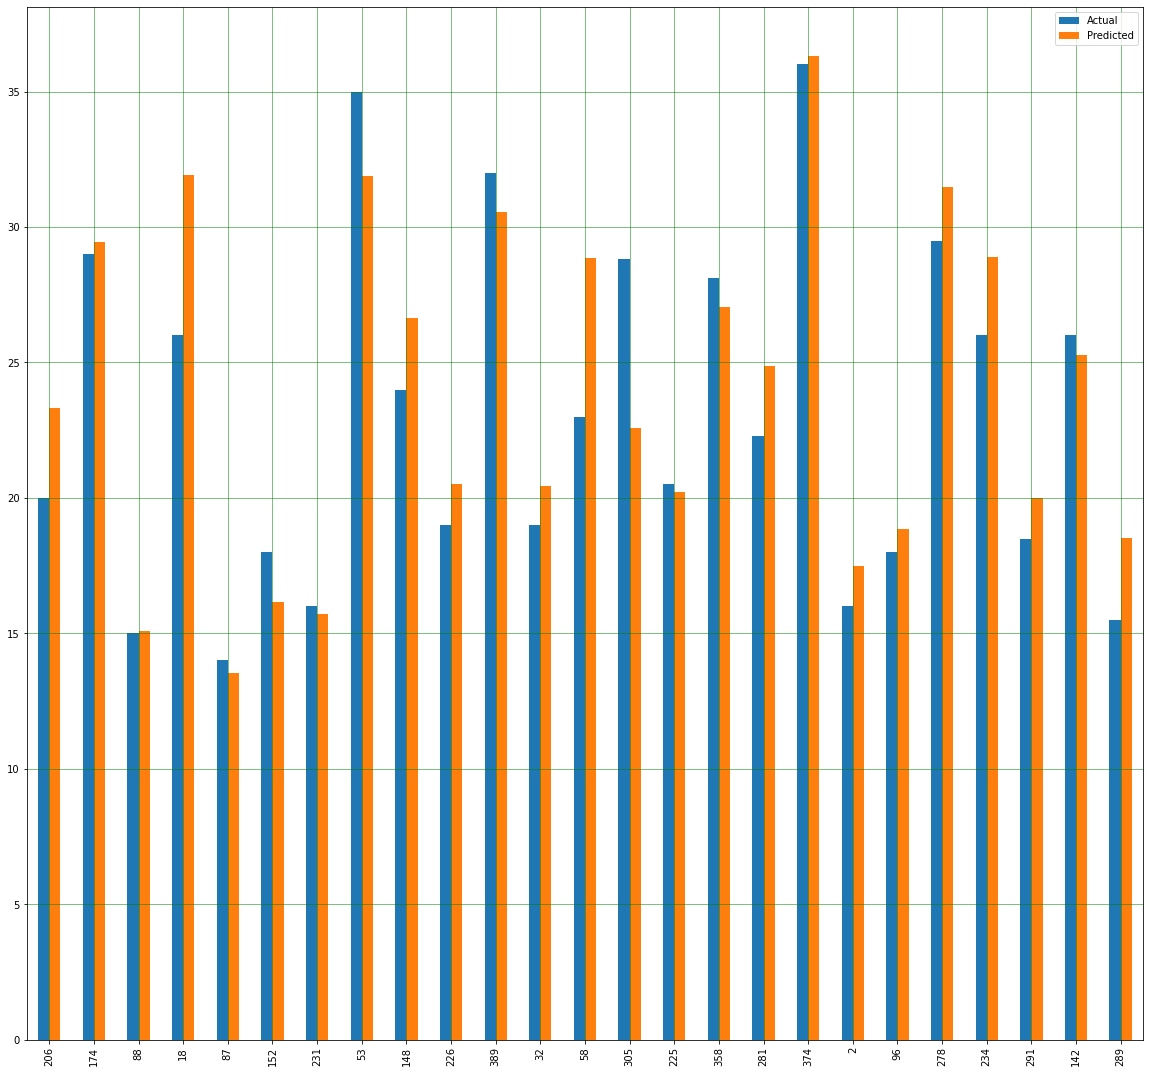

In [102]:
df1=df.head(25)
df1.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,19));
plt.grid(which='major',ls='-',linewidth=0.5,color='g')
plt.grid(which='minor',ls=':',linewidth=0.5,color='b')
plt.show()

In [103]:
print('Mean Absolute Error',mean_absolute_error(testy,pred))
print('Mean Squared Error',mean_squared_error(testy,pred))
print('Root Mean Sqaured Error',np.sqrt(mean_squared_error(testy,pred)))

Mean Absolute Error 1054299011303.7745
Mean Squared Error 3.0270984824050786e+25
Root Mean Sqaured Error 5501907380540.933


**dividing 90:10**

In [104]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.1,random_state=69)

In [105]:
LR=LinearRegression()
LR.fit(trainx,trainy)

LinearRegression()

In [106]:
pred=LR.predict(testx)
mean_squared_error(pred,testy)

6.1197006835937495

In [107]:
df=pd.DataFrame({'Actual':testy,'Predicted':pred})
df

,Actual,Predicted
206,20.0,23.484375
174,29.0,29.437500
88,15.0,14.718750
18,26.0,31.078125
87,14.0,13.250000
152,18.0,16.703125
231,16.0,15.218750
53,35.0,31.734375
148,24.0,27.156250
226,19.0,19.796875


In [108]:
print('Mean Absolute Error',mean_absolute_error(testy,pred))
print('Mean Squared Error',mean_squared_error(testy,pred))
print('Root Mean Sqaured Error',np.sqrt(mean_squared_error(testy,pred)))

Mean Absolute Error 1.8791406249999998
Mean Squared Error 6.1197006835937495
Root Mean Sqaured Error 2.473802878887837


**80:20 :::** 
Mean Absolute Error 2.012801621835443
Mean Squared Error 6.538767175795156
Root Mean Sqaured Error 2.5571013229426707



**90:10 :: **
Mean Absolute Error 1.8791406249999998
Mean Squared Error 6.1197006835937495
Root Mean Sqaured Error 2.473802878887837



**70:30**
Mean Absolute Error 1054299011303.7745
Mean Squared Error 3.0270984824050786e+25
Root Mean Sqaured Error 5501907380540.933



**most least error is in 90 :10 split**